In [107]:
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
df_data = pd.read_csv("data.csv")
df_labels = pd.read_csv("labels.csv")
df_data.head()
df_labels.head()


,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


Standardize the Data:
Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. 

In [74]:
frames = [df_data, df_labels]
df_data_label = pd.concat([df_data, df_labels],axis=1,sort=True)
df_data_label.head()



,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Unnamed: 0,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,sample_0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,sample_1,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,sample_2,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,sample_3,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,sample_4,BRCA


In [76]:
#df_names=list(df_data.columns.values)
x = df_data_label.drop(['Unnamed: 0','Class'], 1)  
y = df_data_label['Class']  


#Standarizing features

In [56]:
#x = StandardScaler().fit_transform(x)

In [80]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [31]:
#print(principalComponents)

[[-57.44698696  95.41098053]
 [-16.91943004   0.73247061]
 [-70.34521779 -19.30332604]
 ...
 [ -4.13308967  15.69001356]
 [-30.81475745  33.52642255]
 [-22.34455668   4.05235631]]


In [81]:
finalDf = pd.concat([principalDf, df_data_label[['Class']]], axis = 1)
col1=finalDf.iloc[:,0]
col1.head()

0   -62.755415
1    -2.432896
2   -71.266853
3   -84.770785
4   -69.560171
Name: principal component 1, dtype: float64

In [82]:
finalDf.head()

,principal component 1,principal component 2,Class
0,-62.755415,-94.071973,PRAD
1,-2.432896,90.585842,LUAD
2,-71.266853,-8.064608,PRAD
3,-84.770785,-73.244566,PRAD
4,-69.560171,-9.612940,BRCA


In [99]:
#colors = ("red", "green", "blue","purple","yellow")
#groups = ["PRAD","LUAD","BRCA","KIRC","COAD"]


#PLot PCA

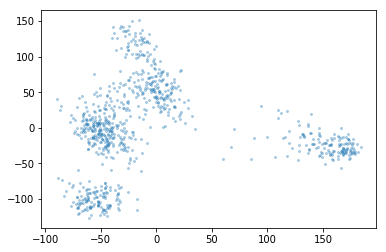

In [106]:
fig_PCA = plt.scatter(finalDf.iloc[:,0], finalDf.iloc[:,1],s=4, alpha=0.3, cmap='RdYlBu_r')
fig_PCA.figure.savefig('PCA_test.png')



#Plot by Class


In [ ]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot(x=finalDf.iloc[:,0], y= finalDf.iloc[:,1], data=finalDf,hue="Class" ,fit_reg=False, legend=False)
 
 
sns.plt.show()